<a href="https://colab.research.google.com/github/dani-lbnl/2022_als_user_meeting/blob/main/02_stackoverview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALS User Meeting 2022
This notebook describes methods to extract key information from microCT image stacks
- Create image montage
- Access slices evenly spaced
- Play slices like a video

Created by Dani Ushizima, CAMERA, LBNL - Aug 1st 2022


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, morphology, io
from glob import glob


# 1. Read a microct image
- from url
- from NERSC
- from Google drive

## Read from NERSC
- discard this portion if running in Colab

In [ ]:
datapath = "/global/cfs/cdirs/als/users/yourname/yourdata/" #update these values
!ls -lt "$datapath"

In [ ]:
image = io.imread(datapath+'bead_pack.tif')

## Read from Google drive 
- discard this portion if running at NERSC

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
datapath = "/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/"
!ls -lt "$datapath"

total 7842
-rw------- 1 root root 8025493 Aug 11 16:46 bead_pack.tif
drwx------ 2 root root    4096 Aug 11 16:35 concrete


In [8]:
def loadFileNames(path,extension):
  ''' Return filename after using colab files.upload - work for 1 file'''
  fnames = glob(path+extension)
  fnames.sort()
  print(path);
  print(f"Number of files: {len(fnames)}")
  return fnames

In [51]:
loadFileNames(datapath+'concrete/','*tif')

/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/concrete/
Number of files: 20


['/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/concrete/F2_8bit_filter0000.tif',
 '/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/concrete/F2_8bit_filter0001.tif',
 '/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/concrete/F2_8bit_filter0002.tif',
 '/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/concrete/F2_8bit_filter0003.tif',
 '/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/concrete/F2_8bit_filter0004.tif',
 '/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/concrete/F2_8bit_filter0005.tif',
 '/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/concrete/F2_8bit_filter0006.tif',
 '/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/concrete/F2_8bit_filter0007.tif',
 '/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/concrete/F2_8bit_filter0008.tif',
 '/content/drive/My

# 2. How to create an image montage?
- 3x3
- with all your slices

In [52]:
def montage(path,extension,save=False):
        '''Create montage 3x3 '''
        files = loadFileNames(path, extension)
        nfiles = len(files)
        fig, axes = plt.subplots(3, 3, figsize=(10, 10))
        #Plotting subset of slices evenly spaced
        islices = np.linspace(0,nfiles-1,9,dtype=int)
        islices = islices.astype(int)
        for i, n in enumerate(islices):
            img = io.imread(files[n])
            xy = np.unravel_index(i, (3,3))
            axes[xy].imshow(img,cmap='gray')
            axes[xy].set_title('Slice %i'% n)
            axes[xy].set_axis_off()
            #fig.subplots_adjust( wspace = -0.1,  hspace = 0.1 )    
        if(save):
            fig.savefig(path+'MyMontage.png')
            print('Saved@ '+path+'MyMontage.png')

/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/concrete/
Number of files: 20


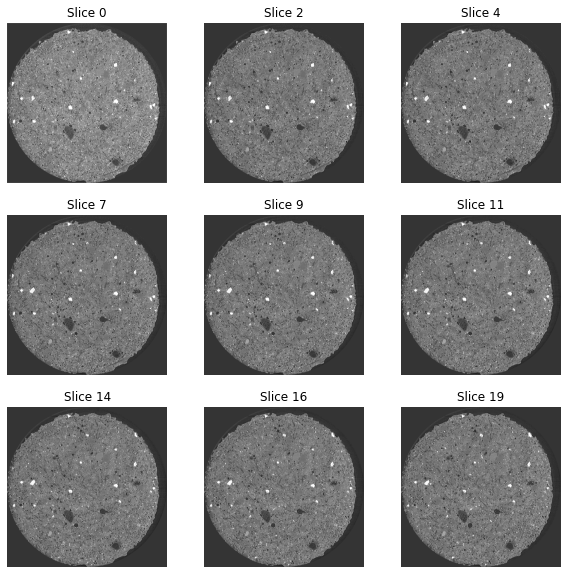

In [53]:
montage(datapath+'concrete/',extension)

In [54]:
def readAndShowMosaic(path,extension):
  '''Read and show ALL images from a folder
     Warning: if nfiles too large, select subset of files
  '''
  files = loadFileNames(path, extension)
  nfiles = len(files)
  y = np.ceil(np.sqrt(nfiles)).astype('int')
  x = np.ceil(nfiles/y).astype('int')
  f, ax = plt.subplots(x, y, figsize=(20, 20))
  
  for i,axi in enumerate(ax.flatten()[0:nfiles]):
    img = io.imread(files[i])
    fileCore = str.split(files[i],'/')[-1]
    fileCore = str.split(fileCore,'.')[0]
    axi.imshow(img[::10,::10],cmap='inferno')
    axi.set_axis_off()
    axi.set_title(fileCore)

/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/concrete/
Number of files: 20


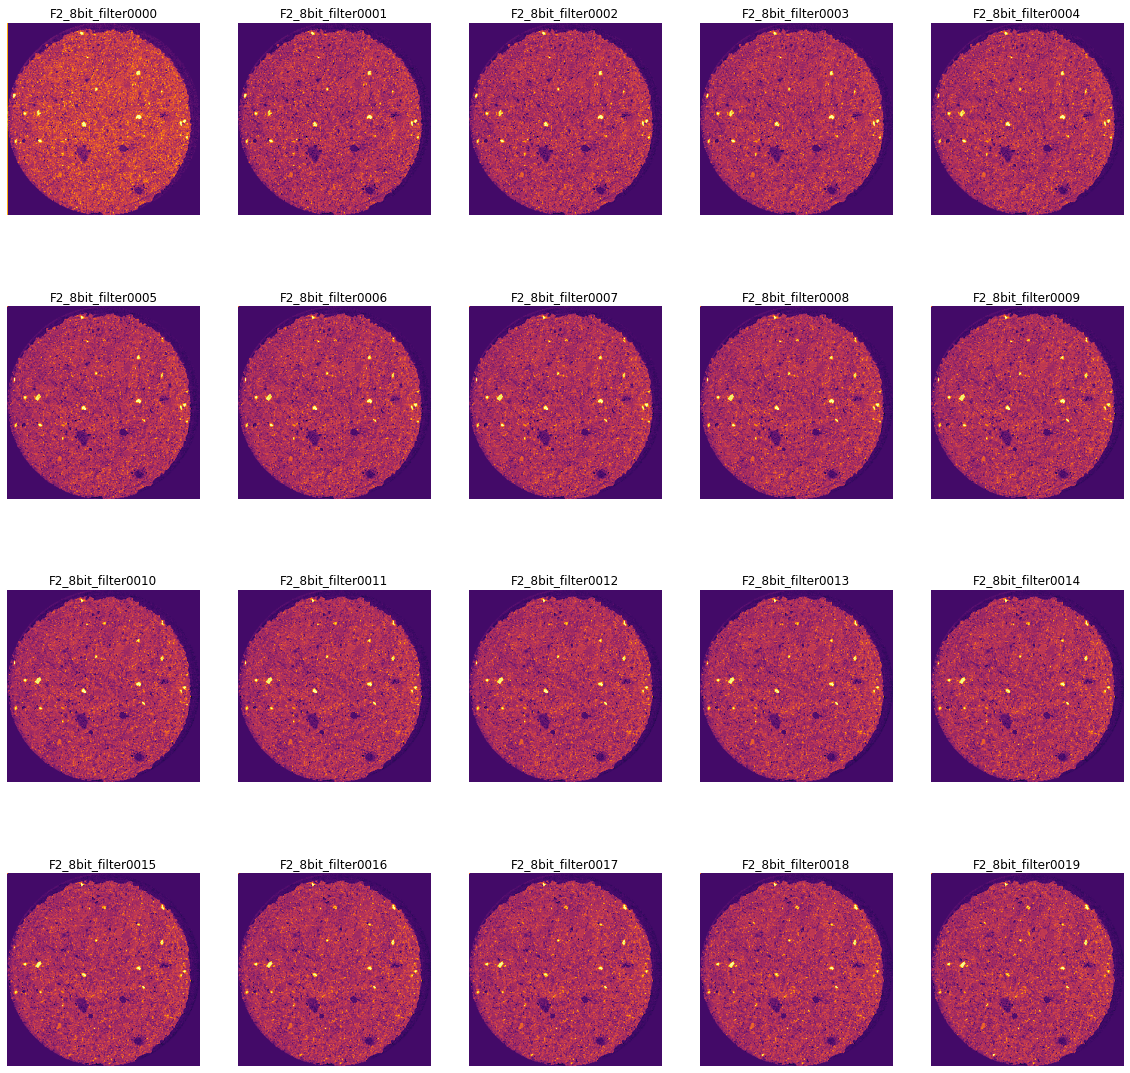

In [55]:
readAndShowMosaic(datapath+'concrete/',extension)

## Play your stack

In [46]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [49]:
ic = io.ImageCollection(slices,conserve_memory=True)
fullstack = ic[0:10].concatenate()


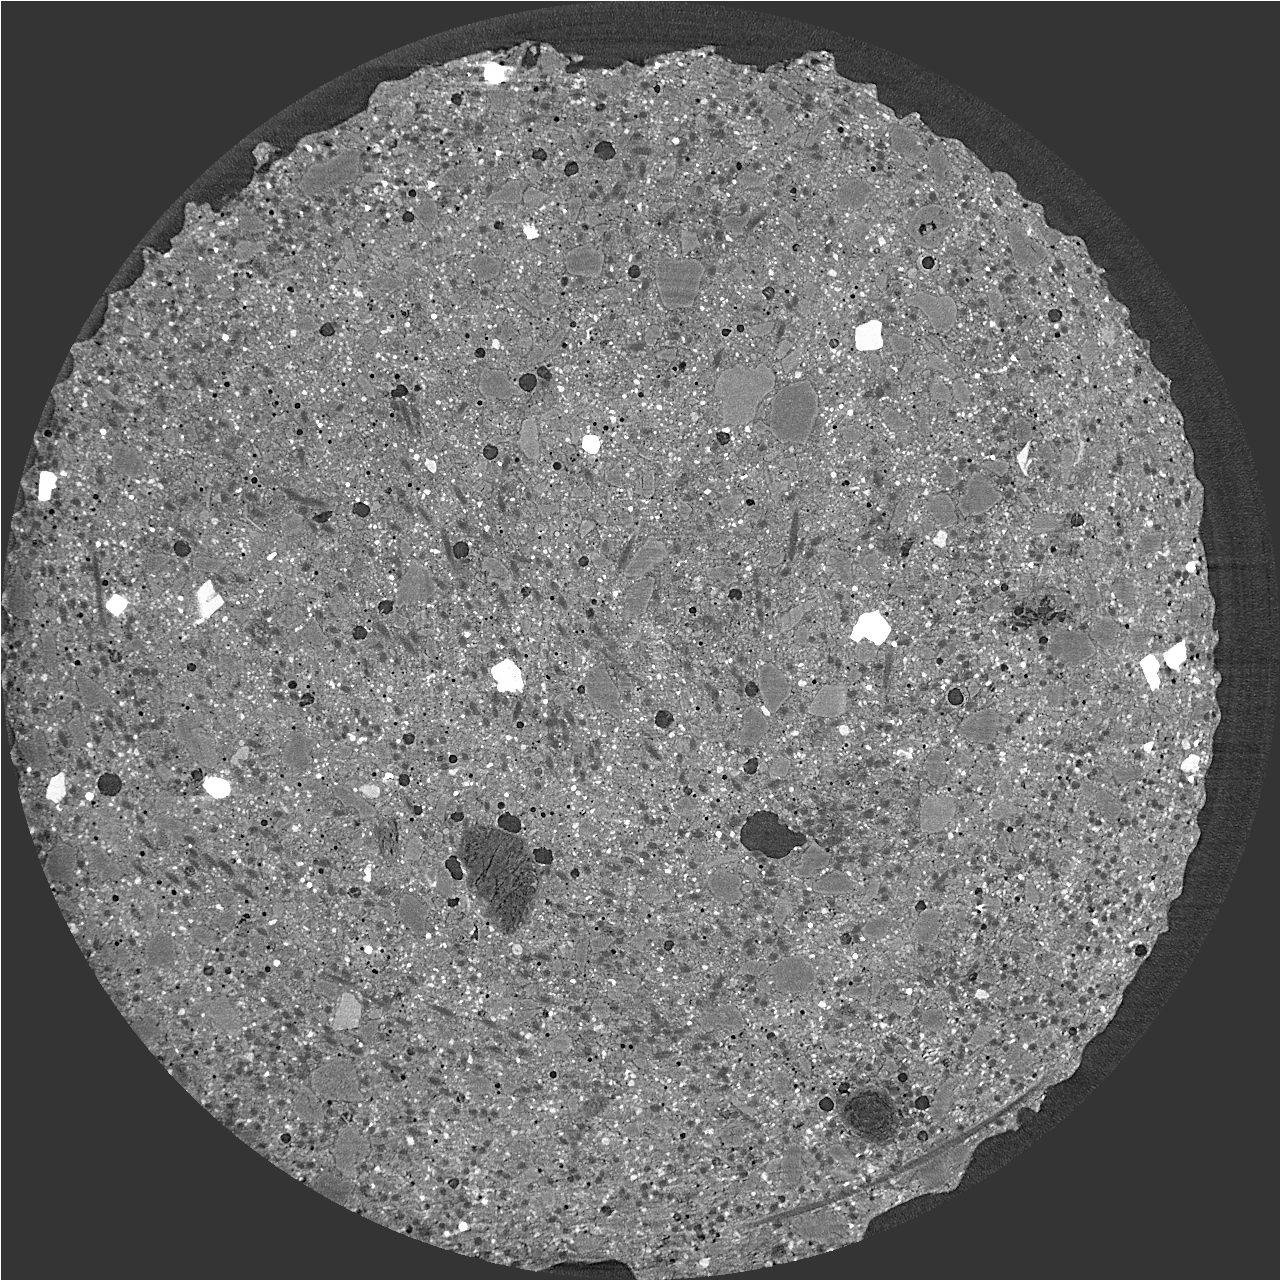
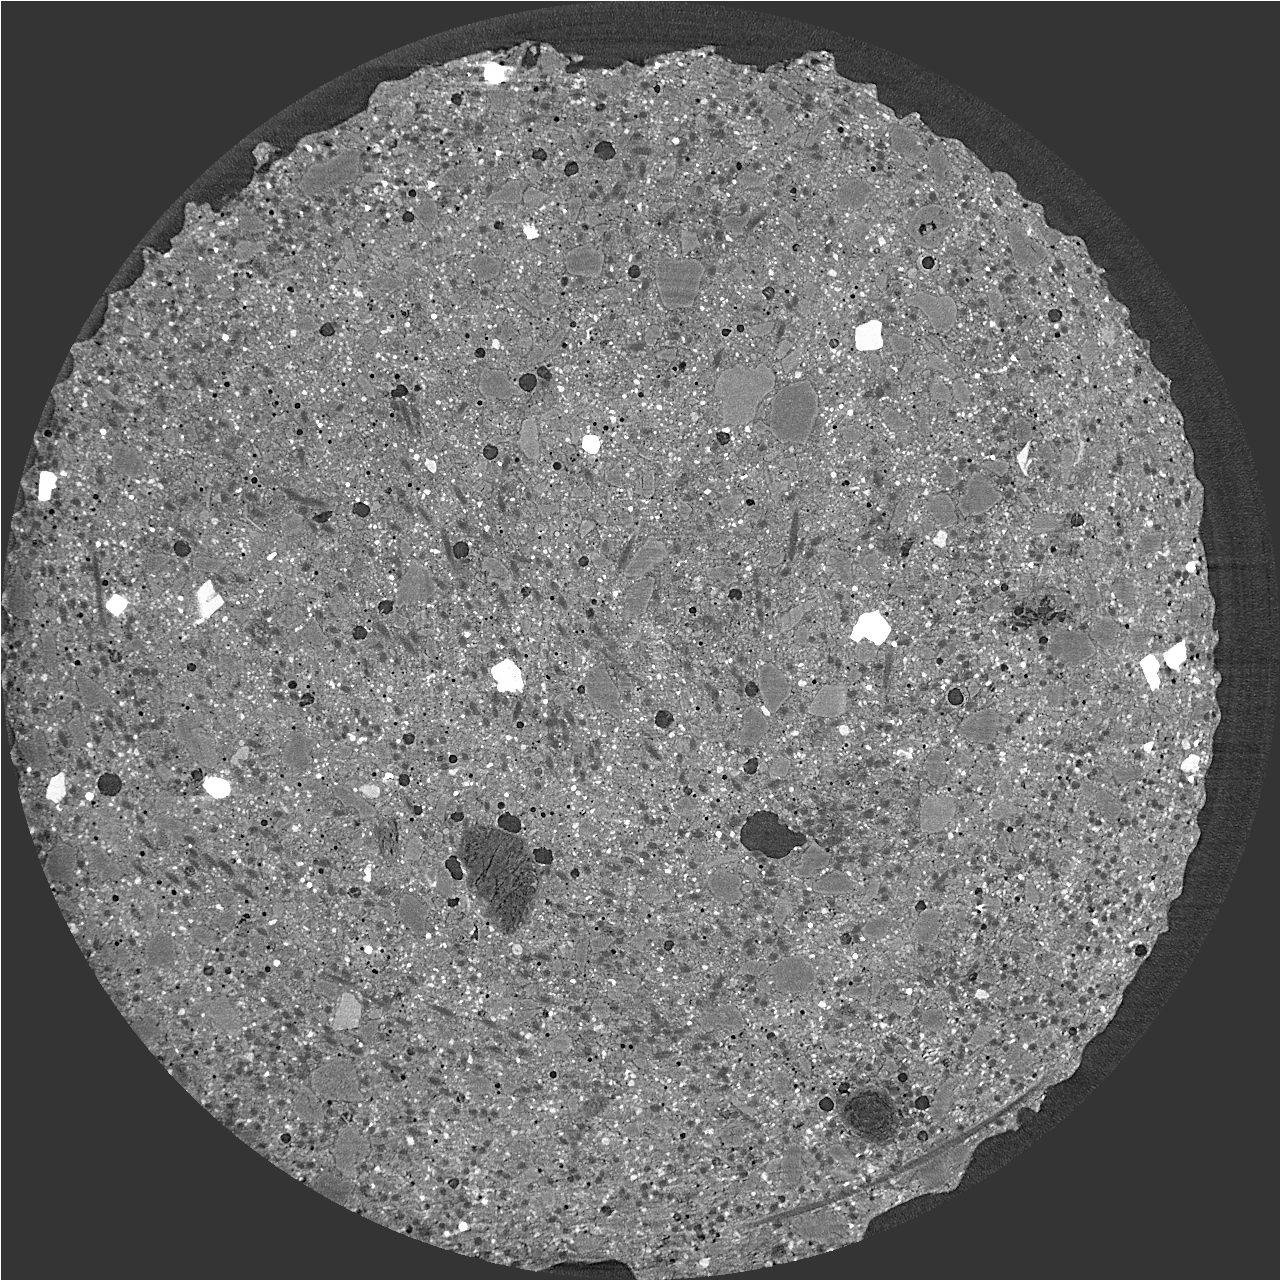
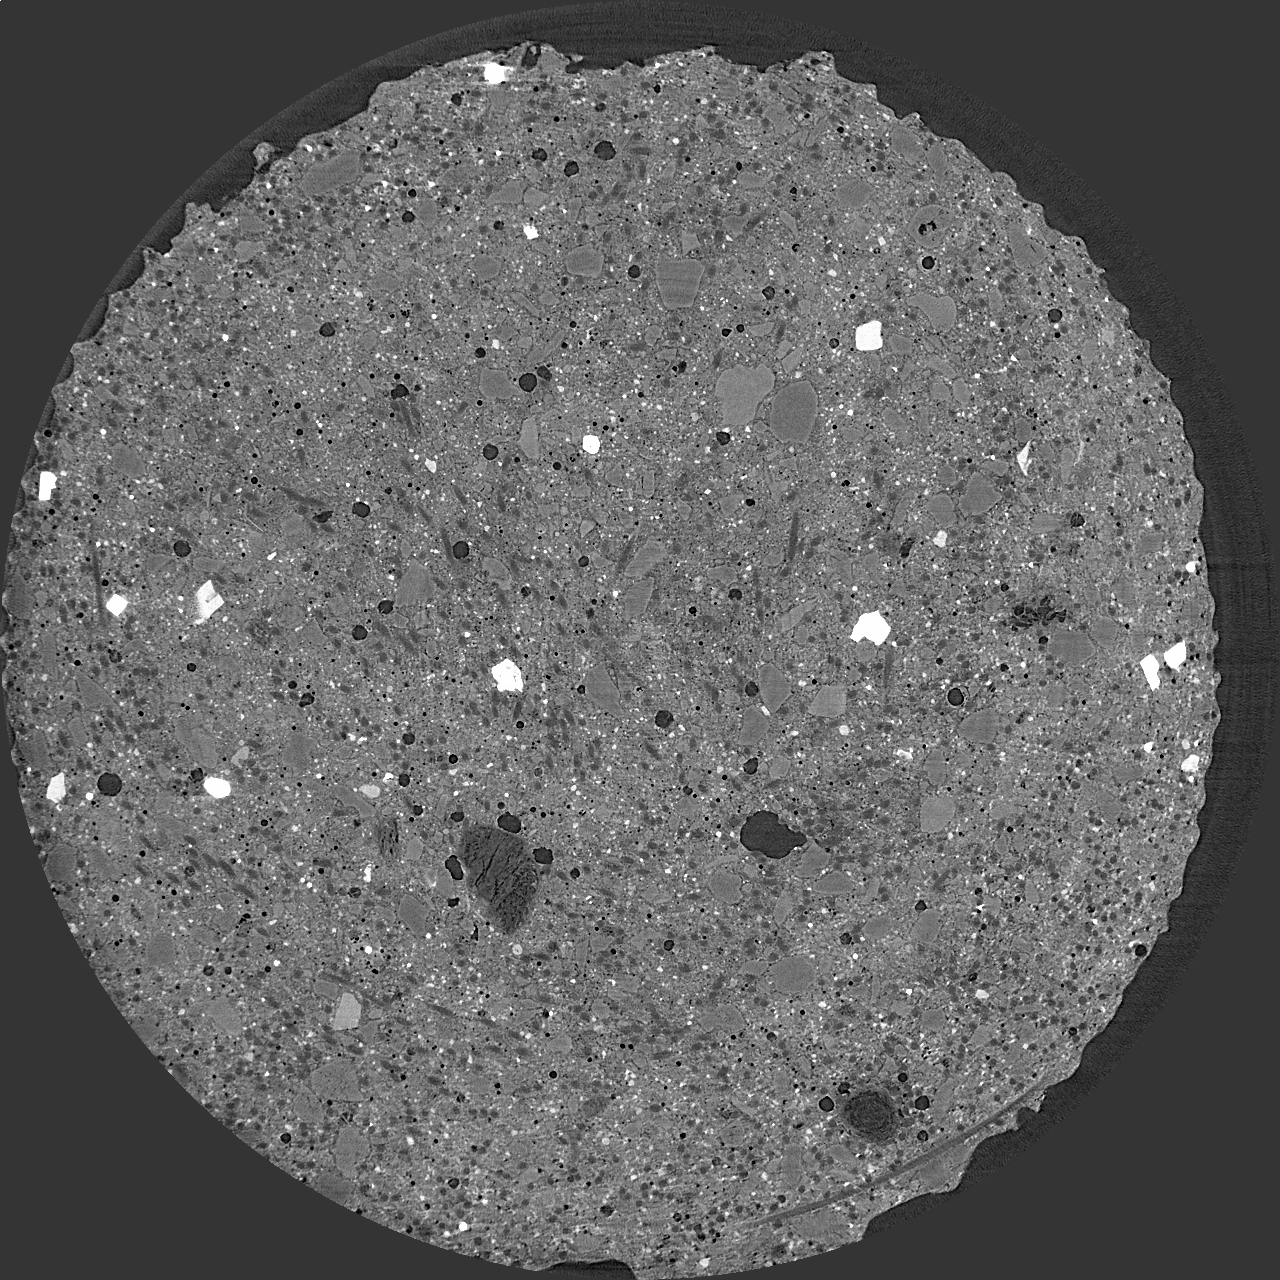
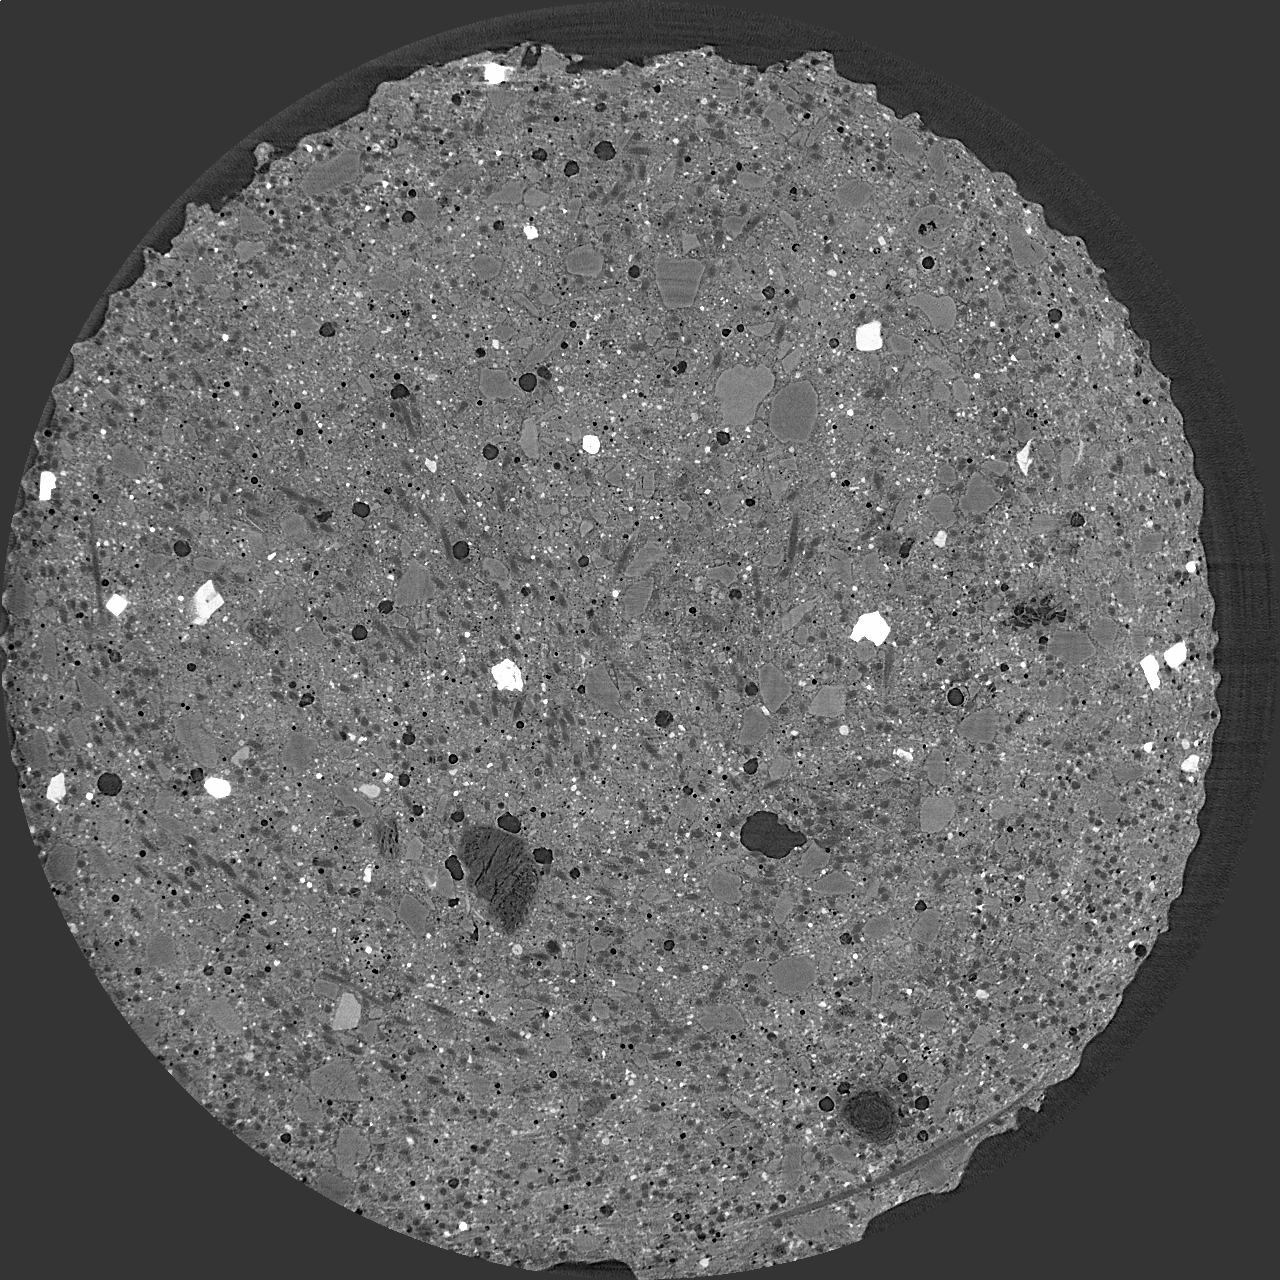
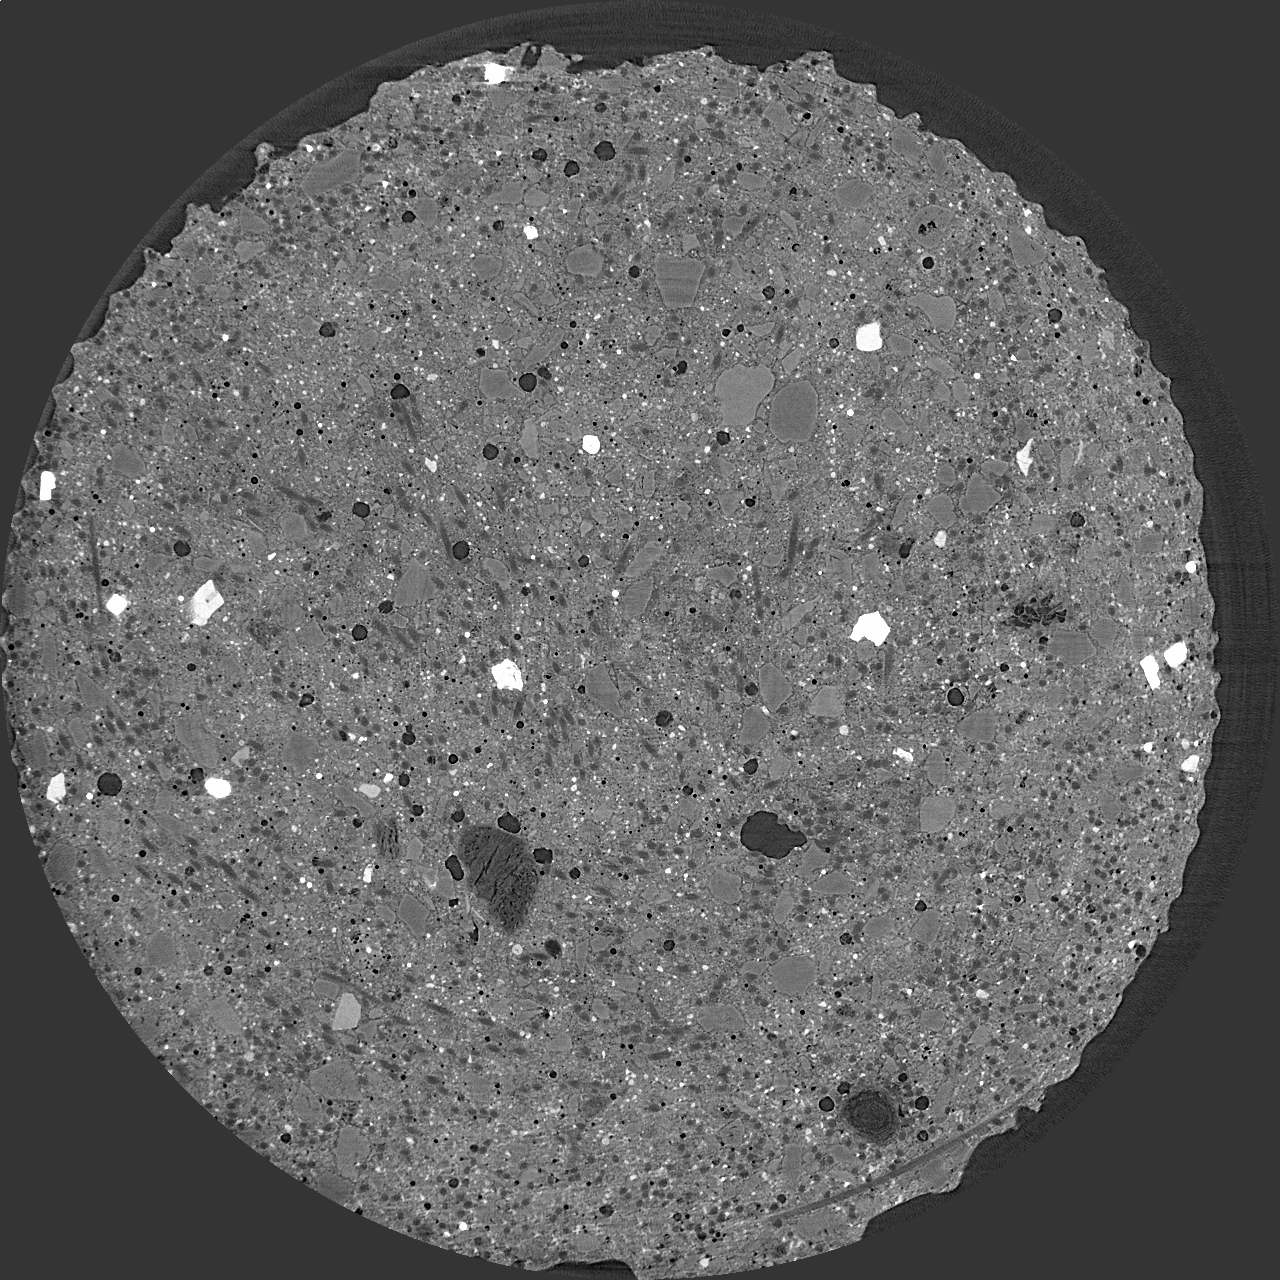

In [50]:
import plotly.express as px
downsample = 2 
fig = px.imshow( fullstack[:,::downsample,::downsample] , animation_frame=0, binary_string=True, labels=dict(animation_frame="root scan"))
fig.show()